Yiğithan Kardaş<br>
201101003<br>
y.kardas@etu.edu.tr

<div style="display: flex; justify-content: center;">
  <h1><b>YAP 470 Proje</b></h1>
</div>

Veri setine göre eğitilecek olan modelin, öğrencilerin başarısını tahmin etmesi beklenen bir Makine Öğrenmesi projesidir.

<div style="display: flex; justify-content: center;">
  <h1>Exploratory Data Analysis</h1>
</div>

Gerekli kütüphaneleri *import* edelim.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Eğitim verisini dosyadan okuyoruz ve *DataFrame*'e çeviriyoruz.

In [101]:
df = pd.read_csv('./train.csv')

Veri setinde __234__ satır ve __33__ sütun var.

In [102]:
df.shape

(234, 33)

Veri setinde görüldüğü üzere sadece sayısal değerler yok, *string* tipinde değerler de var.

In [103]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Bunu, sütun tiplerine bakarak da doğruluyoruz.

In [104]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Bizim bu veri setinde amacımız, __G3__ hariç geri kalan 32 sütunla modeli eğitip test verilerinde __G3__ değerini tahmin etmek.

Veri setindeki sütunların açıklamarı şunlardır:<br>
- __school__: Öğrencinin okulu
    - __GP__: Gabriel Pereira
    - __MS__: Mousinho da Silveira
- __sex__: Öğrencinin cinsiyeti
    - __F__: Kadın
    - __M__: Erkek
- __age__: Öğrencinin yaşı
- __address__: Öğrencinin adresi
    - __U__: Urban(Kent)
    - __R__: Rural(Kırsal)
- __famsize__: Öğrencinin aile büyüklüğü
    - __GT3__: 3'ten fazla
    - __LE3__: 3'ten az
- __Pstatus__: Ebeveynlerin birlikte yaşama durumu
    - __A__: Ayrı
    - __T__: Birlikte
- __Medu__: Annenin öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Fedu__: Babanın öğrenim durumu
    - __0__: Yok
    - __1__: İlköğretim (4. sınıfa kadar)
    - __2__: 5 - 9. sınıf arası
    - __3__: Ortaöğretim
    - __4__: Yükseköğretim
- __Mjob__: Annenin mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __Fjob__: Babanın mesleği
    - __at_home__: Çalışmıyor
    - __health__: Sağlık sektörü
    - __services__: Kamu hizmetleri
    - __teacher__: Öğretmen
    - __other__: Diğer
- __reason__: Bu okulu tercih etme sebebi
    - __course__: Kurs tercihi
    - __home__: Eve yakınlık
    - __reputation__: Okulun itibarı/ünü
    - __other__: Diğer
- __guardian__: Öğrencinin velisi
    - __mother__: Anne
    - __father__: Baba
    - __other__: Diğer
- __traveltime__: Evden okula gelme süresi
    - __1__: 15 dakikadan az
    - __2__: 15 - 30 dakika arası
    - __3__: 30 - 60 dakika arası
    - __4__: 1 saatten fazla
- __studytime__: Öğrencinin haftalık çalışma saati
    - __1__: 2 saatten az
    - __2__: 2 - 5 saat arası
    - __3__: 5 - 10 saat arası
    - __4__: 10 saatten fazla
- __failures__: Geçmişte başarısız olunan ders sayısı
    - __0__: 0
    - __1__: 1
    - __2__: 2
    - __3__: 3
- __schoolsup__: Ekstra öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __famsup__: Ailenin öğrenim desteği
    - __yes__: Var
    - __no__: Yok
- __paid__: Ders konusu dahilinde ekstra ücretli dersler (Matematik veya Portekizce)
    - __yes__: Var
    - __no__: Yok
- __activities__: Müfredat dışı etkinlikler
    - __yes__: Var
    - __no__: Yok
- __nursery__: Öğrenci anaokuluna gitti mi?
    - __yes__: Evet
    - __no__: Hayır
- __higher__: Öğrenci yükseköğrenim görmek istiyor mu?
    - __yes__: Evet
    - __no__: Hayır
- __internet__: Öğrencinin evde internet erişimi var mı?
    - __yes__: Evet
    - __no__: Hayır
- __romantic__: Öğrencinin romantik ilişkisi var mı?
    - __yes__: vVar
    - __no__: Yok
- __famrel__: Öğrencinin ailesiyle ilişkisinin kalitesi
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __freetime__: Öğrencinin okuldan sonra boş zamanı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __goout__: Öğrencinin arkadaşlarıyla dışarı çıkma sıklığı
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Dalc__: Öğrencinin hafta içi alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __Walc__: Öğrencinin hafta sonu alkol tüketimi
    - __1__: Çok az
    - __2__: Az
    - __3__: Normal
    - __4__: Fazla
    - __5__: Çok fazla
- __health__: Öğrencinin sağlık durumu
    - __1__: Çok kötü
    - __2__: Kötü
    - __3__: Normal
    - __4__: İyi
    - __5__: Çok iyi
- __absences__: Öğrencinin devamsızlık sayısı
- __G1__: Öğrencinin 1. sınav notu
- __G2__: Öğrencinin 2. sınav notu
- __G3__: Öğrencinin final notu

Tüm *string*'leri sayısal veriye çevirdik. Ayrıca *natural order*'a sahip olmayan verileri de *one-hot* türüne çevirdik.

In [105]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [106]:
'''df['school'] = df['school'].map({'GP': 0, 'MS': 1})
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['address'] = df['address'].map({'U': 0, 'R': 1})
df['famsize'] = df['famsize'].map({'GT3': 0, 'LE3': 1})
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
df['Mjob'] = df['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
df['Fjob'] = df['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})
df['reason'] = df['reason'].map({'course':1,'reputation':2,'home':3,'other':4})
df['guardian'] = df['guardian'].map({'mother':1,'father':2,'other':3})
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
df['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})
df_numeric = df'''

"df['school'] = df['school'].map({'GP': 0, 'MS': 1})\ndf['sex'] = df['sex'].map({'F': 0, 'M': 1})\ndf['address'] = df['address'].map({'U': 0, 'R': 1})\ndf['famsize'] = df['famsize'].map({'GT3': 0, 'LE3': 1})\ndf['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})\ndf['Mjob'] = df['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})\ndf['Fjob'] = df['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})\ndf['reason'] = df['reason'].map({'course':1,'reputation':2,'home':3,'other':4})\ndf['guardian'] = df['guardian'].map({'mother':1,'father':2,'other':3})\ndf['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})\ndf['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})\ndf['paid'] = df['paid'].map({'no': 0, 'yes': 1})\ndf['activities'] = df['activities'].map({'no': 0, 'yes': 1})\ndf['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})\ndf['higher'] = df['higher'].map({'no': 0, 'yes': 1})\ndf['internet'] = df['internet'].map({'no': 0, 'yes': 1})\ndf['romanti

In [107]:
g1 = df['G1']
g2 = df['G2']
g3 = df['G3']
df = df.drop(labels=['G1', 'G2', 'G3'], axis=1)

In [108]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [109]:
df_numeric = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'paid'])
df_numeric['G1'] = g1
df_numeric['G2'] = g2
df_numeric['G3'] = g3
df_numeric.head()

,age,traveltime,studytime,failures,Dalc,Walc,absences,school_GP,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,Fedu_0,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,...,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,famrel_1,famrel_2,famrel_3,famrel_4,famrel_5,freetime_1,freetime_2,freetime_3,freetime_4,freetime_5,goout_1,goout_2,goout_3,goout_4,goout_5,health_1,health_2,health_3,health_4,health_5,paid_no,paid_yes,G1,G2,G3
0,18,2,2,0,1,1,6,True,True,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,...,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,5,6,6
1,17,1,2,0,1,1,4,True,True,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,5,5,6
2,15,1,2,3,2,3,10,True,True,False,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,...,False,False,True,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,7,8,10
3,15,1,3,0,1,1,2,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,15,14,15
4,16,1,2,0,1,2,4,True,True,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,6,10,10


Veri setinde *NaN* veir yok.

In [110]:
df_numeric.isna().sum()

age           0
traveltime    0
studytime     0
failures      0
Dalc          0
             ..
paid_no       0
paid_yes      0
G1            0
G2            0
G3            0
Length: 82, dtype: int64

Veri setinde birbirinin kopyası olan herhangi iki veri yok.

In [111]:
df_numeric.duplicated().sum()

0

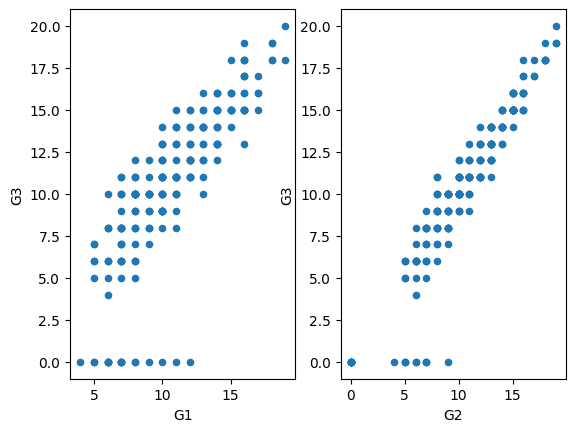

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_numeric.plot(kind='scatter', x='G1', y='G3', ax=axes[0])
df_numeric.plot(kind='scatter', x='G2', y='G3', ax=axes[1])
plt.show()

<div style="display: flex; justify-content: center;">
  <h1><b>Modeli Eğitmek</b></h1>
</div>

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [114]:
X_train = df_numeric.values.tolist()
y_train = [];
column_length = len(X_train[0])
for row in X_train:
    y_train.append(int(row[column_length - 1]));
    del row[column_length - 1];

X_train=pd.Series(X_train).tolist();
y_train=pd.Series(y_train).tolist();

In [115]:
df_test = pd.read_csv('./test.csv')
g1_test = df_test['G1']
g2_test = df_test['G2']
g3_test = df_test['G3']
df_test = df_test.drop(labels=['G1', 'G2', 'G3'], axis=1)
df_test = pd.get_dummies(df_test, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'paid'])
df_test['G1'] = g1_test
df_test['G2'] = g2_test
df_test['G3'] = g3_test

In [116]:
'''df_test['school'] = df_test['school'].map({'GP': 0, 'MS': 1})
df_test['sex'] = df_test['sex'].map({'F': 0, 'M': 1})
df_test['address'] = df_test['address'].map({'U': 0, 'R': 1})
df_test['famsize'] = df_test['famsize'].map({'GT3': 0, 'LE3': 1})
df_test['Pstatus'] = df_test['Pstatus'].map({'A': 0, 'T': 1})
df_test['Mjob'] = df_test['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
df_test['Fjob'] = df_test['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})
df_test['reason'] = df_test['reason'].map({'course':1,'reputation':2,'home':3,'other':4})
df_test['guardian'] = df_test['guardian'].map({'mother':1,'father':2,'other':3})
df_test['schoolsup'] = df_test['schoolsup'].map({'no': 0, 'yes': 1})
df_test['famsup'] = df_test['famsup'].map({'no': 0, 'yes': 1})
df_test['paid'] = df_test['paid'].map({'no': 0, 'yes': 1})
df_test['activities'] = df_test['activities'].map({'no': 0, 'yes': 1})
df_test['nursery'] = df_test['nursery'].map({'no': 0, 'yes': 1})
df_test['higher'] = df_test['higher'].map({'no': 0, 'yes': 1})
df_test['internet'] = df_test['internet'].map({'no': 0, 'yes': 1})
df_test['romantic'] = df_test['romantic'].map({'no': 0, 'yes': 1})'''

"df_test['school'] = df_test['school'].map({'GP': 0, 'MS': 1})\ndf_test['sex'] = df_test['sex'].map({'F': 0, 'M': 1})\ndf_test['address'] = df_test['address'].map({'U': 0, 'R': 1})\ndf_test['famsize'] = df_test['famsize'].map({'GT3': 0, 'LE3': 1})\ndf_test['Pstatus'] = df_test['Pstatus'].map({'A': 0, 'T': 1})\ndf_test['Mjob'] = df_test['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})\ndf_test['Fjob'] = df_test['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})\ndf_test['reason'] = df_test['reason'].map({'course':1,'reputation':2,'home':3,'other':4})\ndf_test['guardian'] = df_test['guardian'].map({'mother':1,'father':2,'other':3})\ndf_test['schoolsup'] = df_test['schoolsup'].map({'no': 0, 'yes': 1})\ndf_test['famsup'] = df_test['famsup'].map({'no': 0, 'yes': 1})\ndf_test['paid'] = df_test['paid'].map({'no': 0, 'yes': 1})\ndf_test['activities'] = df_test['activities'].map({'no': 0, 'yes': 1})\ndf_test['nursery'] = df_test['nursery'].map({'no'

In [117]:
X_test = df_test.values.tolist()
y_test = []
for row in X_test:
    y_test.append(int(row[column_length - 1]));
    del row[column_length - 1];

X_test=pd.Series(X_test).tolist();
y_test=pd.Series(y_test).tolist();

In [118]:
dtr = DecisionTreeRegressor()
param_grid_dtr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr, cv=5)
grid_search_dtr.fit(X_train, y_train)
print("Best parameters: ", grid_search_dtr.best_params_)
print("Best score: ", grid_search_dtr.best_score_)
best_model = grid_search_dtr.best_estimator_
test_score = best_model.score(X_test, y_test)
print('Best R^2: ', test_score)

Best parameters:  {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.8454952087858743
Best R^2:  0.7384361664975082


In [119]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("K-fold cross validation results: ", scores)
print("Mean performance: ", np.mean(scores))

K-fold cross validation results:  [ 8.26455926e-01  4.51334814e-01 -3.68614816e+19  5.89626882e-01
  7.81936734e-01]
Mean performance:  -7.3722963191481e+18


In [120]:
rfr = RandomForestRegressor()
param_grid_rfr = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2'],
}
grid_Search_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=5, n_jobs=-1)
grid_Search_rfr.fit(X_train, y_train)
print("Best parameters: ", grid_Search_rfr.best_params_)
print("Best score: ", grid_Search_rfr.best_score_)
best_model = grid_Search_rfr.best_estimator_
test_score = best_model.score(X_test, y_test)
print('Best R^2: ', test_score)

Best parameters:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.8727821821208668
Best R^2:  0.7552082117753025


In [121]:
ela = ElasticNet()
param_grid_elastic_net = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
grid_search_elastic_net = GridSearchCV(estimator=ela, param_grid=param_grid_elastic_net, cv=5)
grid_search_elastic_net.fit(X_train, y_train)
print("Best parameters: ", grid_search_elastic_net.best_params_)
print("Best score: ", grid_search_elastic_net.best_score_)
best_model = grid_search_elastic_net.best_estimator_
test_score = best_model.score(X_test, y_test)
print('Best R^2: ', test_score)

Best parameters:  {'alpha': 1.0, 'l1_ratio': 0.9}
Best score:  0.8717368109567835
Best R^2:  0.7170579310414784


In [122]:
xgb = XGBRegressor()
param_grid_xgb = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [10, 30, 50],
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print('Best R^2: ', test_score)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 200}
Best score:  0.8669536772653016
Best R^2:  0.7307057371184473


In [123]:
from catboost import CatBoostRegressor

cat = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28]
model = CatBoostRegressor(iterations=1000, use_best_model=True, eval_metric = 'RMSE')
model.fit(X_train, y_train, cat_features=cat, eval_set=(X_test, y_test), plot=True)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040538
0:	learn: 4.3933971	test: 4.5912522	best: 4.5912522 (0)	total: 161ms	remaining: 2m 41s
1:	learn: 4.3047062	test: 4.5263561	best: 4.5263561 (1)	total: 190ms	remaining: 1m 34s
2:	learn: 4.2249180	test: 4.4813502	best: 4.4813502 (2)	total: 238ms	remaining: 1m 19s
3:	learn: 4.1171816	test: 4.4106023	best: 4.4106023 (3)	total: 281ms	remaining: 1m 10s
4:	learn: 4.0288057	test: 4.3343747	best: 4.3343747 (4)	total: 314ms	remaining: 1m 2s
5:	learn: 3.9432505	test: 4.2677362	best: 4.2677362 (5)	total: 339ms	remaining: 56.1s
6:	learn: 3.8349384	test: 4.1953650	best: 4.1953650 (6)	total: 376ms	remaining: 53.4s
7:	learn: 3.7510268	test: 4.1632200	best: 4.1632200 (7)	total: 409ms	remaining: 50.7s
8:	learn: 3.6510635	test: 4.0918324	best: 4.0918324 (8)	total: 433ms	remaining: 47.7s
9:	learn: 3.5687419	test: 4.0237719	best: 4.0237719 (9)	total: 469ms	remaining: 46.5s
10:	learn: 3.5028140	test: 3.9612346	best: 3.9612346 (10)	total: 476ms	remaining: 42.8s
11:	learn: 3.43816